In [26]:
# On cherche à dérerminer quels paramètres du modèle permette une meilleure généralisation.

# Par exemple pour un modèle SVC avec un noyau RBF, il y a deux paramètres alpha et gamma, pour 6 valeurs de chaque,
# il existe 36 combinaisons

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()

X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Taille du jeu d'entraînement : {}, taille du jeu de test: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001,0.01,0.1,1,10,100]:
    for alpha in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=alpha)
        svm.fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        if score > best_score:
            best_score = score
            best_parameters = { 'C': alpha, 'gamma': gamma}
print("Meilleur score : {:.2f}".format(best_score))
print("Meilleurs paramètres : {}".format(best_parameters))

Taille du jeu d'entraînement : 112, taille du jeu de test: 38
Meilleur score : 0.97
Meilleurs paramètres : {'C': 100, 'gamma': 0.001}


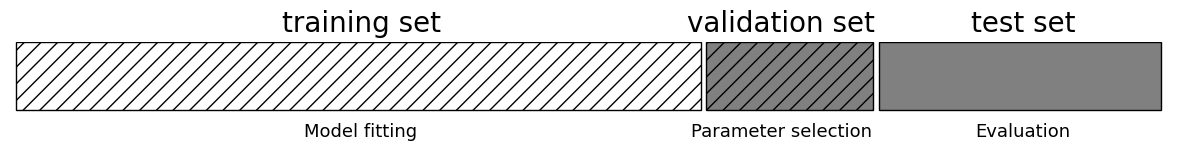

In [8]:
# La question qui reste en suspend est : est on certain que cette sélection de paramètre offrira ce score de généralisation
# sur un nouveau de jeu de données ?
# Pour améliorer la pertinence du score, on divise le jeu en trois :
# 1 jeu d'entrainnement
# 1 jeu d'amélioration paramétrique 
# 1 jeu d'évaluation
import mglearn

mglearn.plots.plot_threefold_split()

In [30]:

X_train,X_eval, y_train, y_eval = train_test_split(iris.data, iris.target, random_state=0)
# on redivise le jeu d'entrainnement en deux jeux
X_train_model,X_find_params, y_train_model, y_find_params = train_test_split(X_train, y_train, random_state=1)

print("Taille du jeu d'entrainement du modèle {}, taille du jeu d'amélioration {}, taille du jeu d'évaluation : {}".format(
X_train_model.shape[0], X_find_params.shape[0],X_eval.shape[0]))

for gamma in [0.001,0.01,0.1,1,10,100]:
    for alpha in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=alpha)
        svm.fit(X_train_model,y_train_model)
        score = svm.score(X_find_params,y_find_params)
        if score > best_score:
            best_score = score
            best_parameters = { 'C': alpha, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_train,y_train)
eval_score = svm.score(X_eval,y_eval)
print("Meilleur score à la fin de la sélection des paramètres : {:.2f}".format(best_score))
print("Meilleurs paramètres : {}".format(best_parameters))
print("Meilleur score avec un modèle entraînné et les meilleurs paramètres : {:.2f}".format(eval_score))


Taille du jeu d'entrainement du modèle 84, taille du jeu d'amélioration 28, taille du jeu d'évaluation : 38
Meilleur score à la fin de la sélection des paramètres : 1.00
Meilleurs paramètres : {'C': 100, 'gamma': 0.001}
Meilleur score avec un modèle entraînné et les meilleurs paramètres : 0.97
